In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Use the SMOTE-balanced data from the original code
# X_train_balanced, y_train_balanced

# --- 1. Train and Evaluate Support Vector Machine (SVM) ---
print("--- Testing with SVM ---")
svc_model = SVC(random_state=42).fit(X_train_balanced, y_train_balanced)
y_pred_svc = svc_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_svc, zero_division=0))

# --- 2. Train and Evaluate K-Nearest Neighbors (KNN) ---
print("\n--- Testing with KNN ---")
knn_model = KNeighborsClassifier().fit(X_train_balanced, y_train_balanced)
y_pred_knn = knn_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_knn, zero_division=0))

# --- 3. Train and Evaluate Logistic Regression ---
print("\n--- Testing with Logistic Regression ---")
lr_model = LogisticRegression(random_state=42).fit(X_train_balanced, y_train_balanced)
y_pred_lr = lr_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr, zero_division=0))

--- Testing with SVM ---
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       972
           1       0.11      0.46      0.18        50

    accuracy                           0.80      1022
   macro avg       0.54      0.64      0.53      1022
weighted avg       0.93      0.80      0.85      1022


--- Testing with KNN ---
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       972
           1       0.12      0.38      0.18        50

    accuracy                           0.83      1022
   macro avg       0.54      0.62      0.55      1022
weighted avg       0.92      0.83      0.87      1022


--- Testing with Logistic Regression ---
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       972
           1       0.14      0.82      0.24        50

    accuracy                           0.74      1022
   macro avg       0.56      0.78  

In [ ]:
# Import the necessary libraries
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# --- 1. Test ADASYN (another over-sampling method) ---
print("--- Testing with ADASYN ---")
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_scaled, y_train)
rf_adasyn = RandomForestClassifier(random_state=42).fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = rf_adasyn.predict(X_test_scaled)
print(classification_report(y_test, y_pred_adasyn, zero_division=0))

# --- 2. Test Tomek Links (an under-sampling method) ---
# Note: Under-sampling is usually less effective when data is scarce, but it's important to test.
print("\n--- Testing with Tomek Links ---")
tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train_scaled, y_train)
rf_tl = RandomForestClassifier(random_state=42).fit(X_train_tl, y_train_tl)
y_pred_tl = rf_tl.predict(X_test_scaled)
print(classification_report(y_test, y_pred_tl, zero_division=0))

# --- 3. Test Cost-Sensitive Learning (Algorithm-level) ---
print("\n--- Testing with Cost-Sensitive Learning ---")
# We train on the original *imbalanced* scaled data, but tell the model to penalize errors on the minority class.
rf_cost_sensitive = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_cost_sensitive.fit(X_train_scaled, y_train)
y_pred_cs = rf_cost_sensitive.predict(X_test_scaled)
print(classification_report(y_test, y_pred_cs, zero_division=0))

--- Testing with ADASYN ---
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.16      0.16      0.16        50

    accuracy                           0.92      1022
   macro avg       0.56      0.56      0.56      1022
weighted avg       0.92      0.92      0.92      1022


--- Testing with Tomek Links ---
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022


--- Testing with Cost-Sensitive Learning ---
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0

--- Installing required libraries ---
--- Libraries installed successfully ---

--- Step 1: Loading Data ---
--- Step 2: Preprocessing Data ---
Data preprocessing complete.

--- Step 3: Modeling and Handling Imbalance ---
Balanced Model Trained Successfully.


--- Step 4: Interpreting the Model with SHAP ---
Explainer created.
SHAP values calculated successfully.

--- 4a. Generating Global Feature Importance Plot ---


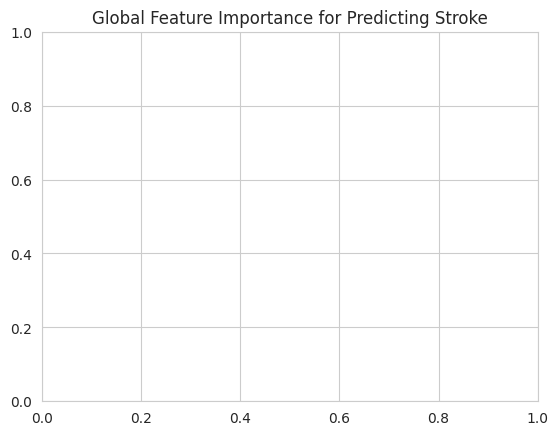

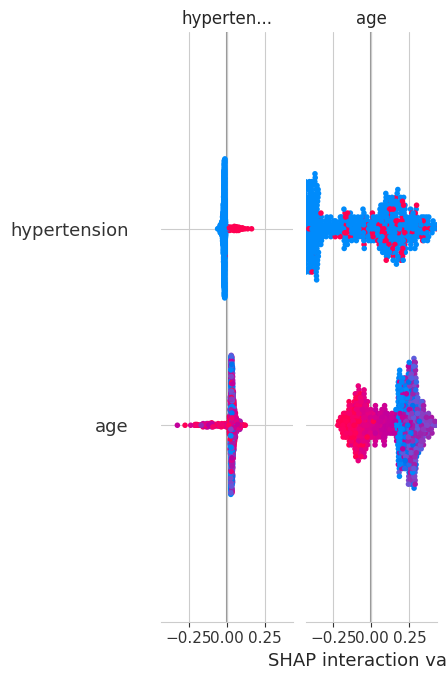


--- 4b. Generating Local Explanation for a Single Patient ---


Explaining the prediction for patient index #0 in the test set:


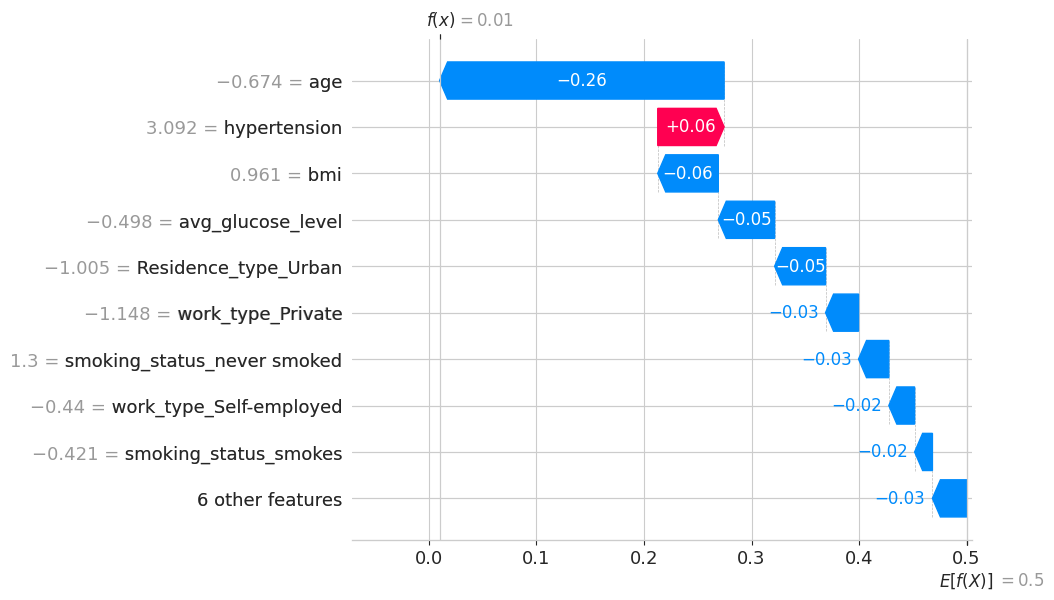



--- Workflow Complete ---


In [ ]:
# ==============================================================================
# STEP 0: INSTALL LIBRARIES
# ==============================================================================
print("--- Installing required libraries ---")
!pip install imbalanced-learn --quiet
!pip install shap --quiet
print("--- Libraries installed successfully ---\n")


# ==============================================================================
# STEP 1: LOAD DATA AND INITIAL PREP
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

print("--- Step 1: Loading Data ---")

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Drop irrelevant/problematic data
df = df.drop('id', axis=1)
df = df[df['gender'] != 'Other']


# ==============================================================================
# STEP 2: FULL DATA PREPROCESSING
# ==============================================================================
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("--- Step 2: Preprocessing Data ---")

# Impute missing BMI values
numerical_cols_for_imputation = ['age', 'avg_glucose_level', 'bmi']
imputer = IterativeImputer(max_iter=10, random_state=42)
df[numerical_cols_for_imputation] = imputer.fit_transform(df[numerical_cols_for_imputation])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target (y)
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

# Capture the final list of feature names for later use in plotting
final_feature_names = X.columns.tolist()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the data and keep it as NumPy arrays
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing complete.\n")


# ==============================================================================
# STEP 3: HANDLING CLASS IMBALANCE AND MODELING
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

print("--- Step 3: Modeling and Handling Imbalance ---")

# We will use the balanced model for explanation
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(X_train_balanced, y_train_balanced)

print("Balanced Model Trained Successfully.\n")

# ==============================================================================
# STEP 4: MODEL INTERPRETATION (FIXED VERSION FOR SHAP)
# ==============================================================================
import shap
import pandas as pd

print("\n--- Step 4: Interpreting the Model with SHAP ---")

# --- Create the explainer ---
explainer = shap.TreeExplainer(rf_balanced)
print("Explainer created.")

# --- Calculate SHAP values with the additivity check disabled ---
shap_values = explainer.shap_values(X_test_scaled, check_additivity=False)
print("SHAP values calculated successfully.")

# --- Convert the NumPy test data to a DataFrame for plotting ---
X_test_df = pd.DataFrame(X_test_scaled, columns=final_feature_names)

# --- Plotting Global Importance ---
print("\n--- 4a. Generating Global Feature Importance Plot ---")
plt.title("Global Feature Importance for Predicting Stroke")

# Handle different return formats of shap_values
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test_df, plot_type="bar")
else:
    shap.summary_plot(shap_values, X_test_df, plot_type="bar")

# --- Plotting Local Importance ---
print("\n--- 4b. Generating Local Explanation for a Single Patient ---")
shap.initjs()

patient_index = 0
print(f"Explaining the prediction for patient index #{patient_index} in the test set:")

# --- Get the expected_value ---
expected_value = explainer.expected_value
if isinstance(expected_value, list) or isinstance(expected_value, np.ndarray):
    # Pick the expected value for class 1 (stroke = 1)
    expected_value = expected_value[1]

# --- Get SHAP values for this patient ---
if isinstance(shap_values, list):
    shap_value_patient = shap_values[1][patient_index]   # already class 1
else:
    shap_value_patient = shap_values[patient_index]


if shap_value_patient.ndim > 1 and shap_value_patient.shape[1] == 2:
    shap_value_patient = shap_value_patient[:, 1]


explanation = shap.Explanation(
    values=shap_value_patient,
    base_values=expected_value,
    data=X_test_df.iloc[patient_index].values,
    feature_names=X_test_df.columns.tolist()
)

# --- Waterfall plot ---
shap.waterfall_plot(explanation)



print("\n\n--- Workflow Complete ---")


